#  Linear & RBF Kernal with Social_Network_Ads dataset

In [148]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel('Social_Network_Ads.xlsx')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [170]:
X = data[['Age','EstimatedSalary']]
Y = data.iloc[:,-1]
b = int(len(X) * 0.7)

scalar = StandardScaler() 
X = scalar.fit_transform(X)
x_train = X[:b]
x_test = X[b:]
y_train = Y[:b]
y_test = Y[b:]

/home/aadithya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/aadithya/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [137]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [139]:
linear_clf = SVC(kernel='linear')
rbf_clf = SVC(kernel='rbf')

In [140]:
linear_clf.fit(x_train,y_train)
rbf_clf.fit(x_train,y_train)

/home/aadithya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aadithya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [172]:
def plot(x_train, y_train, clf, plt):
    X_set, y_set =x_train, y_train
    X_grid_0 = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,step = 0.01)
    X_grid_1 = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,step = 0.01)
    X1 , X2 = np.meshgrid(X_grid_0, X_grid_1)

    X3 = clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape)
    plt.contourf(X1, X2, X3, alpha = 0.50, cmap = ListedColormap(("yellow","cyan")))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(("yellow", "cyan"))(i), label = j,edgecolors = "Black")
    plt.legend()
    plt.show()


#  Linear Kernal

In [168]:
y_pred = linear_clf.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix: ')
for i in cm:
    print(i)
print('\nAccuracy :', accuracy_score(y_pred, y_test))

Confusion matrix: 
[75  7]
[ 8 30]

Accuracy : 0.875


## Train set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


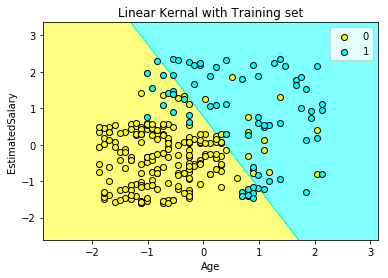

In [174]:
plt.title("Linear Kernal with Training set")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plot(x_train, y_train, linear_clf, plt)


## Test Set 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


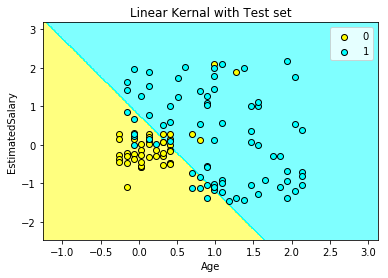

In [175]:
plt.title("Linear Kernal with Test set")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plot(x_test, y_test, linear_clf, plt)


# RBF Kernal

In [169]:
y_pred = rbf_clf.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix: ')
for i in cm:
    print(i)
print('\nAccuracy :', accuracy_score(y_pred, y_test))

Confusion matrix: 
[75  2]
[ 8 35]

Accuracy : 0.9166666666666666


## Train set 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


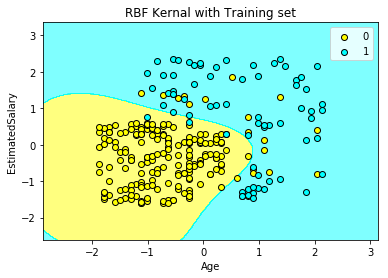

In [176]:
plt.title("RBF Kernal with Training set")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plot(x_train, y_train, rbf_clf, plt)


## Test set 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


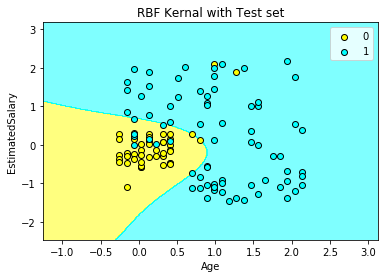

In [177]:
plt.title("RBF Kernal with Test set")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plot(x_test, y_test, rbf_clf, plt)
